In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/CROP PREDICTION.csv")
data.head()

,Year,District,Crop,Area,Tanks,Bore_Wells,Open_Wells,Production,Yield
0,2005,Kancheepuram,Paddy,114720,60732,12166,47252,293875,2562
1,2006,Kancheepuram,Paddy,103107,80055,8190,42426,395134,3832
2,2007,Kancheepuram,Paddy,91356,57026,9096,56041,345129,3778
3,2008,Kancheepuram,Paddy,90874,62080,6481,45929,329210,3623
4,2009,Kancheepuram,Paddy,91020,68479,7286,30418,331434,3641


In [3]:
data.describe()

,Year,Area,Tanks,Bore_Wells,Open_Wells,Production,Yield
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2008.500000,23322.502688,16684.838710,12791.060484,38968.197581,63962.009409,1879.081989
std,2.292829,40653.966566,22979.623991,19082.678575,35471.154054,121898.531242,1412.271456
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,244.250000,287.000000,771.000000,9154.000000,357.750000,818.250000
50%,2008.500000,3976.000000,4978.000000,5267.500000,31094.000000,5885.500000,1525.000000
75%,2010.250000,21416.000000,25063.750000,16015.000000,58036.000000,64720.750000,3058.000000
max,2012.000000,186307.000000,80055.000000,92451.000000,138143.000000,789997.000000,5670.000000


In [4]:
data.isnull().sum()

,0
Year,0
District,0
Crop,0
Area,0
Tanks,0
Bore_Wells,0
Open_Wells,0
Production,0
Yield,0


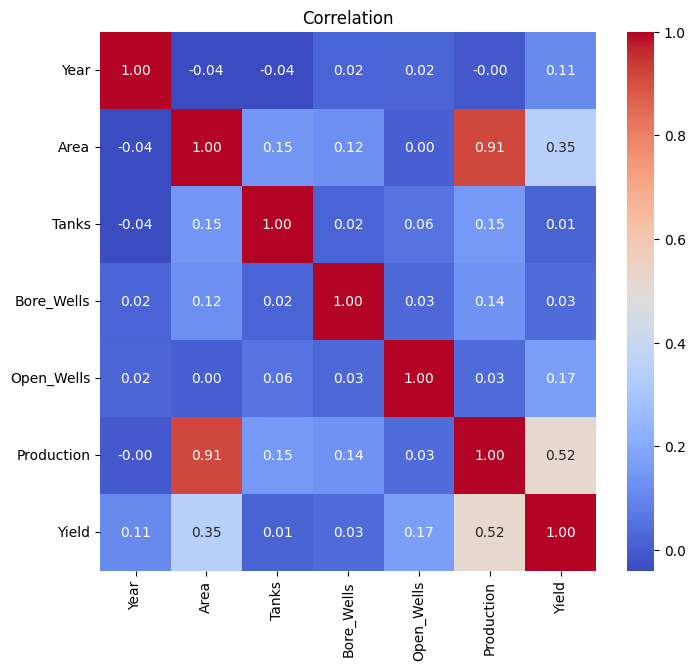

In [5]:
#correlation
numerical_features = data.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation")
plt.show()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        744 non-null    int64 
 1   District    744 non-null    object
 2   Crop        744 non-null    object
 3   Area        744 non-null    int64 
 4   Tanks       744 non-null    int64 
 5   Bore_Wells  744 non-null    int64 
 6   Open_Wells  744 non-null    int64 
 7   Production  744 non-null    int64 
 8   Yield       744 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 52.4+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder_district = LabelEncoder()
data['District'] = label_encoder_district.fit_transform(data['District'])
label_encoder_crop = LabelEncoder()
data['Crop'] = label_encoder_crop.fit_transform(data['Crop'])
encoded_districts = data['District'].unique()
encoded_crops = data['Crop'].unique()


district_names_reversed = label_encoder_district.inverse_transform(encoded_districts)
crop_names_reversed = label_encoder_crop.inverse_transform(encoded_crops)

district_mapping = dict(zip(encoded_districts, district_names_reversed))


crop_mapping = dict(zip(encoded_crops, crop_names_reversed))


print("District Encoding Mapping:")
for encoded_value, district_name in district_mapping.items():
    print(f"Encoded Value: {encoded_value} -> District: {district_name}")

print("\nCrop Encoding Mapping:")
for encoded_value, crop_name in crop_mapping.items():
    print(f"Encoded Value: {encoded_value} -> Crop: {crop_name}")


District Encoding Mapping:
Encoded Value: 6 -> District: Kancheepuram
Encoded Value: 23 -> District: Thiruvallur
Encoded Value: 2 -> District: Cuddallore
Encoded Value: 29 -> District: Villupuram
Encoded Value: 28 -> District: Vellore
Encoded Value: 24 -> District: Thiruvannamalai
Encoded Value: 16 -> District: Salem
Encoded Value: 12 -> District: Namakkal
Encoded Value: 3 -> District: Dharmapuri
Encoded Value: 9 -> District: Krishnagiri
Encoded Value: 1 -> District: Coimbatore
Encoded Value: 22 -> District: Thiruppur
Encoded Value: 5 -> District: Erode
Encoded Value: 27 -> District: Tiruchirapalli
Encoded Value: 8 -> District: Karur
Encoded Value: 13 -> District: Perambalur
Encoded Value: 0 -> District: Ariyalur
Encoded Value: 14 -> District: Pudukkottai
Encoded Value: 18 -> District: Thanjavur
Encoded Value: 25 -> District: Thiruvarur
Encoded Value: 11 -> District: Nagapatinam
Encoded Value: 10 -> District: Madurai
Encoded Value: 20 -> District: Theni
Encoded Value: 4 -> District: Di

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(['Production','Tanks', 'Bore_Wells', 'Open_Wells'], axis=1)
y = data['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

Compare to Linear Regression,Support Vector Regression,Random Forest Regression XGBoost regressor perform well.

In [9]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
xgb_model=XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_predict=xgb_model.predict(X_test)
print(f"mean_absolute_error:{mean_absolute_error(y_test,xgb_predict):.2f}")
print(f"mean_squared_error:{mean_squared_error(y_test,xgb_predict):.2f}")
print(f"r2_score:{r2_score(y_test,xgb_predict):.2f}")

mean_absolute_error:4488.18
mean_squared_error:114519456.00
r2_score:0.99


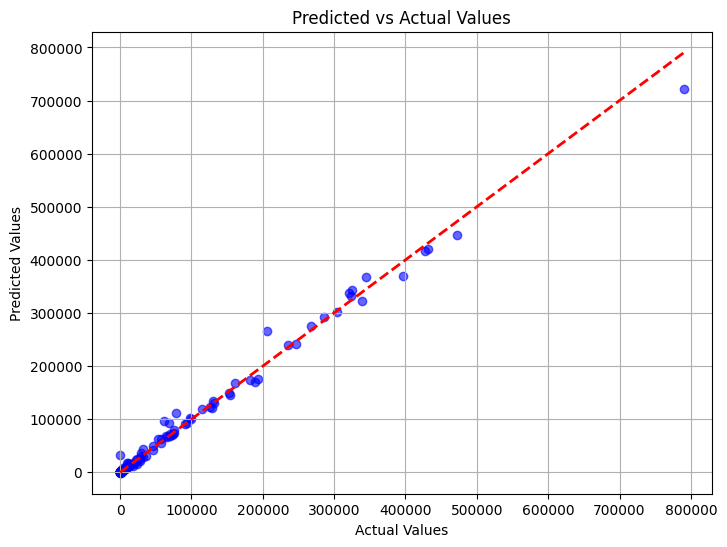

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predict, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', lw=2)
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


Prediction of Crop Production

In [11]:
year_input = int(input("Enter Year : "))
district_input = input("Enter District : ")
crop_input = input("Enter Crop : ")
area_input = int(input("Enter Area (in hectares): "))
yield_input = int(input("Enter Yield (kg per hectare): "))
district_encoded = label_encoder_district.transform([district_input])[0]
crop_encoded = label_encoder_crop.transform([crop_input])[0]

new_data = pd.DataFrame({
        'Year': [year_input],
        'District': [district_encoded],
        'Crop': [crop_encoded],
        'Area': [area_input],
        'Yield': [yield_input]
    })
predicted_production = xgb_model.predict(new_data)
print(f"Predicted Production for {crop_input} in {district_input} for year {year_input}: {predicted_production[0]:.2f}")

Enter Year : 2025
Enter District : Kanniyakumari
Enter Crop : Paddy
Enter Area (in hectares): 1000
Enter Yield (kg per hectare): 3000
Predicted Production for Paddy in Kanniyakumari for year 2025: 9179.66


In [ ]:
new_data

,Year,District,Crop,Area,Yield
0,2040,18,2,10000,200000


In [12]:
import joblib
joblib.dump(xgb_model, 'crop_production_prediction_model.joblib')


['crop_production_prediction_model.joblib']